<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>March Madness Underdog Statistical Analysis</title>
</head>
<body>
    <header>
        <h1>March Madness Underdog Statistical Analysis Program</h1>
    </header>
    <section>
        <h2>Reasoning</h2>
        <p>March Madness is currently underway in the NCAA tournament. I have always been interested in the underdogs in the tournament and what are the contributing factors to the teams' success. Although I cannot evaluate the intangibles like team spirit and hustle, I can look at the advance basketball statistics. This program is not wholly complex but it serves as an excercise in loading and maniplating data with the pandas library. It demonstrates basic trends between statistics that interest me and that I think provide insights into an underdogs success.</p>
    </section>
    <section>
        <h2>Background Info</h2>
        <p>The statistics are from sports-reference.com, a website that provides comprehensive sports stats in .csv files. I was able to download all the csv files with the data through this website.</p>
        <h3>Glossary of Statistics Analyzed</h3>
        <ul>
            <li><strong>Pace</strong> -- Pace Factor: An estimate of school possessions per 40 minutes.</li>
            <li><strong>ORtg</strong> -- Offensive Rating: An estimate of points scored (for teams) or points produced (for players) per 100 possessions.</li>
            <li><strong>FTr</strong> -- Free Throw Attempt Rate: Number of FT Attempts Per FG Attempt.</li>
            <li><strong>3PAr</strong> -- 3-Point Attempt Rate: Percentage of FG Attempts from 3-Point Range.</li>
            <li><strong>TS%</strong> -- True Shooting Percentage: A measure of shooting efficiency that takes into account 2-point field goals, 3-point field goals, and free throws.</li>
            <li><strong>TRB%</strong> -- Total Rebound Percentage: An estimate of the percentage of available rebounds a player grabbed while they were on the floor.</li>
            <li><strong>AST%</strong> -- Assist Percentage: An estimate of the percentage of teammate field goals a player assisted while they were on the floor.</li>
            <li><strong>STL%</strong> -- Steal Percentage: An estimate of the percentage of opponent possessions that end with a steal by the player while they were on the floor.</li>
            <li><strong>BLK%</strong> -- Block Percentage: An estimate of the percentage of opponent two-point field goal attempts blocked by the player while they were on the floor.</li>
            <li><strong>eFG%</strong> -- Effective Field Goal Percentage: Adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.</li>
            <li><strong>TOV%</strong> -- Turnover Percentage: An estimate of turnovers per 100 plays.</li>
            <li><strong>ORB%</strong> -- Offensive Rebound Percentage: An estimate of the percentage of available offensive rebounds a player grabbed while they were on the floor.</li>
            <li><strong>FT/FGA</strong> -- Free Throws Per Field Goal Attempt.</li>
        </ul>
    </section>
</body>
</html>


In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Pre-processing and Cleaning Data</title>
</head>
<body>
    <header>
        <h1>Pre-processing and Cleaning Data</h1>
    </header>
    <section>
        <p>The first step is to load the csv file with all the NCAA games from the past 10 years into a pandas data frame.</p>
    </section>
</body>
</html>


In [2]:

def convert_csv_to_dataframe(file_name):
    """
    Reads a CSV file and converts it into a pandas DataFrame.

    Parameters:
    - file_name: The name of the CSV file to be converted.

    Returns:
    - A pandas DataFrame containing the data from the CSV file.
    """
    # Ensure the pandas library is imported
    try:
        # Attempt to load the CSV file into a DataFrame
        df = pd.read_csv(file_name)
        print("CSV file successfully loaded into DataFrame.")
        return df
    except Exception as e:
        print(f"Error loading CSV file: {e}")
        return None

# The name of the CSV file to be converted
file_name = "data\MNCAATourneyGames14-24.csv"

# Convert the CSV file to a DataFrame
df_MTourneyGames = convert_csv_to_dataframe(file_name)

# If the DataFrame is not None, display the first few rows
if df_MTourneyGames is not None:
    print(df_MTourneyGames.head())


CSV file successfully loaded into DataFrame.
    Rk        Team  Seed        Date             Opp  Opp Seed   Result Round  \
0  NaN         NaN   NaN         NaN             NaN       NaN      NaN   NaN   
1  1.0  Cincinnati   NaN  2024-03-26   Indiana State       NaN  L 81-85   NaN   
2  2.0  High Point   NaN  2024-03-26  Arkansas State       NaN  W 81-80   NaN   
3  3.0  Ohio State   NaN  2024-03-26         Georgia       NaN  L 77-79   NaN   
4  4.0   Fairfield   NaN  2024-03-26         Seattle       NaN  L 58-75   NaN   

  Region  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


<p>Now we load all the season stats of the past 10 years for all NCAA teams:</p>


In [3]:
# Base path for the files, adjust as needed. For simplicity, assuming files are in the current working directory.
base_path = './data/'

# Range of years for the file names
years = range(14, 25)

# Dictionary to hold the data frames, keys are 'MNCAATeamStatsXX' where XX is the year
stats_frames = {}

for year in years:
    file_name = f'MNCAATeamStats{year:02}.csv'  # Ensure year is two digits
    full_path = f'{base_path}{file_name}'
    try:
        # Attempt to load the CSV file into a DataFrame
        df = pd.read_csv(full_path)

        df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # Remove unnamed columns
        # Store the DataFrame in the dictionary
        stats_frames[f'MNCAATeamStats{year:02}'] = df
    except FileNotFoundError as e:
        print(f'File not found: {full_path}', e)
    except Exception as e:
        print(f'Error loading file: {full_path}', e)




In [4]:
# Delete all rows that do not have entries in the "Round" column
df_MTourneyGames = df_MTourneyGames.dropna(subset=['Round'])

# Save the modified DataFrame
output_file_path = 'cleaned_MNCAATourneyGames14-24.csv'
df_MTourneyGames.to_csv(output_file_path, index=False)

print("The cleaned DataFrame has been saved.\n")
print(df_MTourneyGames.head())

The cleaned DataFrame has been saved.

      Rk         Team  Seed             Date            Opp  Opp Seed  \
19  19.0      Clemson   6.0  2024-03-24 NCAA         Baylor       3.0   
20  20.0         Duke   4.0  2024-03-24 NCAA  James Madison      12.0   
23  23.0       Baylor   3.0  2024-03-24 NCAA        Clemson       6.0   
24  24.0      Houston   1.0  2024-03-24 NCAA      Texas A&M       9.0   
25  25.0  Connecticut   1.0  2024-03-24 NCAA   Northwestern       9.0   

           Result      Round Region  
19        W 72-64  Rnd of 32   West  
20        W 93-55  Rnd of 32  South  
23        L 64-72  Rnd of 32   West  
24  W 100-95 (OT)  Rnd of 32  South  
25        W 75-58  Rnd of 32   East  


<p>The next step is to clean the data so that only games where underdogs were successful are left in the data frame:<p>

In [5]:

# Function to check if the winning team was an underdog and return its name, date, and region (numerically coded) if true
def find_underdog_wins(row):
    # Extract relevant information from the row
    team, team_seed = row['Team'], row['Seed']
    opp, opp_seed = row['Opp'], row['Opp Seed']
    result, game_date, region = row['Result'], row['Date'], row['Region']
    
    # Map region names to numbers
    region_map = {'East': 1, 'Midwest': 2, 'South': 3, 'West': 4}
    region_code = region_map.get(region, None)  # Use None as default if region is not found
    
    # Determine if the team won and if it was an underdog
    if 'W' in result:
        if team_seed - opp_seed >= 2:
            return team, game_date, region_code
    elif 'L' in result:
        if opp_seed - team_seed >= 2:
            return opp, game_date, region_code
    return None, None, None

# Apply the function to each row and save results
underdog_wins = [find_underdog_wins(row) for index, row in df_MTourneyGames.iterrows()]

# Filter out None values
underdog_wins = [win for win in underdog_wins if win[0] is not None]

# Convert to DataFrame (optional) and include the numerically coded Region column
df_underdog_wins = pd.DataFrame(underdog_wins, columns=['Team', 'Date', 'Region Code'])

df_underdog_wins = df_underdog_wins.drop_duplicates(subset=['Team', 'Date', 'Region Code'])

# Show the dataframe of underdog wins
print(df_underdog_wins.tail())


                   Team             Date  Region Code
266   Stephen F. Austin  2014-03-21 NCAA            3
268            Stanford  2014-03-21 NCAA            3
272             Harvard  2014-03-20 NCAA            1
273              Dayton  2014-03-20 NCAA            3
274  North Dakota State  2014-03-20 NCAA            4


<p>Finally, we develop the final dataframe by filtering through all the ncaa season stats and saving the season stats from years where underdogs were successful<p>

In [6]:
import pandas as pd
from datetime import datetime

# Assuming df_underdog_wins and stats_frames are already defined elsewhere in your script

def get_year_suffix(date_str):
    clean_date_str = date_str.split()[0]
    try:
        date_obj = datetime.strptime(clean_date_str, '%Y-%m-%d')
        return date_obj.strftime('%y')  # Returns the last two digits of the year
    except ValueError as e:
        print(f"Error converting date: {date_str}. Error: {e}")
        return None

def get_full_year(date_str):
    clean_date_str = date_str.split()[0]
    try:
        date_obj = datetime.strptime(clean_date_str, '%Y-%m-%d')
        return str(date_obj.year)  # Returns the full year as a string
    except ValueError as e:
        print(f"Error extracting year from date: {date_str}. Error: {e}")
        return None

# Initialize an empty DataFrame for the underdog stats
df_underdog_stats = pd.DataFrame()
underdog_stats_rows = []

for index, row in df_underdog_wins.iterrows():
    team_name = row['Team']
    date_str = row['Date']
    year_suffix = get_year_suffix(date_str)
    full_year = get_full_year(date_str)  # Get the full year to use it as a value in the 'Year' column

    df_key = f'MNCAATeamStats{year_suffix}'
    
    if df_key in stats_frames:
        year_df = stats_frames[df_key]
        team_row = year_df[year_df['School'].str.replace(' NCAA', '').str.strip() == team_name].copy()  # Use .copy() to avoid SettingWithCopyWarning

        # Replace the 'Rank' column with the full year or add it if it doesn't exist
        team_row['Year'] = full_year  # This adds the 'Year' column with the full year as its value

        underdog_stats_rows.append(team_row)
    else:
        print(f"No stats found for year: {df_key}")

df_underdog_stats = pd.concat(underdog_stats_rows, ignore_index=True)

if 'Rk' in df_underdog_stats.columns:
    df_underdog_stats.drop(columns=['Rk'], inplace=True)
    df_underdog_stats.rename(columns={'Rk': 'Year'}, inplace=True)  # Rename 'Year' to 'Rank' if you wish to keep the column name consistent

# Display the resulting DataFrame
print(df_underdog_stats.tail())


                      School   G   W   L   W-L%    SRS   SOS   W.1  L.1   W.2  \
130   Stephen F. Austin NCAA  35  32   3  0.914   4.82 -6.76  18.0  0.0  15.0   
131            Stanford NCAA  36  23  13  0.639  13.42  9.00  10.0  8.0  12.0   
132             Harvard NCAA  32  27   5  0.844  10.79 -0.47  13.0  1.0  11.0   
133              Dayton NCAA  37  26  11  0.703  10.55  5.34  10.0  6.0  13.0   
134  North Dakota State NCAA  33  26   7  0.788   6.31 -0.02  12.0  2.0  12.0   

     ...    TS%  TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB%  FT/FGA  Year  
130  ...  0.561  53.8  62.3  11.1   8.6  0.525  14.2  38.4   0.286  2014  
131  ...  0.553  51.3  46.3   7.9  11.6  0.513  14.7  29.3   0.316  2014  
132  ...  0.564  52.1  57.1  11.6  13.4  0.519  15.0  32.8   0.347  2014  
133  ...  0.555  52.7  51.9   9.1   7.3  0.524  15.5  34.0   0.277  2014  
134  ...  0.593  53.2  43.0   9.7  13.1  0.555  13.4  31.7   0.307  2014  

[5 rows x 29 columns]


<h1>Data Analysis</h1>
<p>With the data cleaning and pre-processing finished, we can start the data analyzation. First, we simply tally up the regions in which underdogs have hailed from:</p>


In [7]:
# Count the number of underdog wins per region
underdog_wins_by_region = df_underdog_wins['Region Code'].value_counts()

# Map region codes back to names for readability (if needed)
region_names = {1: 'East', 2: 'Midwest', 3: 'South', 4: 'West'}
underdog_wins_by_region.index = underdog_wins_by_region.index.map(region_names)

# Present the results
print("Underdog Wins by Region:")
print(underdog_wins_by_region)


Underdog Wins by Region:
Region Code
East       39
South      38
Midwest    38
West       27
Name: count, dtype: int64


<p>As you can see, these tallies do not give much information other than underdogs are not as likely to come out of the West region.</p>
<h2>Simple Statistical Analysis</h2>
<p>Now we conduct a simple statistical analysis and find the Mean, Median, Standard Deviation, Range, and Interquartile range of each advanced metric:</p>


In [8]:
# Assuming df_underdog_stats is your DataFrame

# List of specified statistical categories
categories = ['W-L%', 'SRS', 'SOS', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA']

# Initialize a dictionary to store the analysis results
analysis_results = {}

# Iterate through each category to perform the analysis
for category in categories:
    # Calculations
    # Calculations with formatted output for all values
    mean_value = f"{df_underdog_stats[category].mean():.3f}"
    median_value = f"{df_underdog_stats[category].median():.3f}"
    std_dev = f"{df_underdog_stats[category].std():.3f}"
    data_range = f"{df_underdog_stats[category].max() - df_underdog_stats[category].min():.3f}"
    q75, q25 = np.percentile(df_underdog_stats[category], [75 ,25])
    iqr = f"{q75 - q25:.3f}"

    # Store the results in the dictionary
    analysis_results[category] = {
        'Mean': mean_value,
        'Median': median_value,
        'Standard Deviation': std_dev,
        'Range': data_range,
        'Interquartile Range': iqr
    }


# Display the results
for category, results in analysis_results.items():
    print(f"Statistic: {category}")
    for metric, value in results.items():
        print(f"{metric}: {value}")
    print("-" * 30)  # Separator for readability


Statistic: W-L%
Mean: 0.708
Median: 0.703
Standard Deviation: 0.086
Range: 0.366
Interquartile Range: 0.126
------------------------------
Statistic: SRS
Mean: 12.726
Median: 13.940
Standard Deviation: 5.331
Range: 31.770
Interquartile Range: 6.785
------------------------------
Statistic: SOS
Mean: 6.075
Median: 8.590
Standard Deviation: 5.080
Range: 22.330
Interquartile Range: 7.940
------------------------------
Statistic: Pace
Mean: 67.433
Median: 67.200
Standard Deviation: 2.598
Range: 14.400
Interquartile Range: 3.700
------------------------------
Statistic: ORtg
Mean: 109.056
Median: 109.100
Standard Deviation: 4.153
Range: 20.800
Interquartile Range: 6.100
------------------------------
Statistic: FTr
Mean: 0.349
Median: 0.340
Standard Deviation: 0.061
Range: 0.305
Interquartile Range: 0.080
------------------------------
Statistic: 3PAr
Mean: 0.362
Median: 0.360
Standard Deviation: 0.050
Range: 0.219
Interquartile Range: 0.061
------------------------------
Statistic: TS%
Mea

<h2>Simple Statistical Analysis of Teams</h2>

<h3>W-L% (Win-Loss Percentage)</h3>
<p>Mean: 0.708, Median: 0.703. These values are quite high, indicating a generally successful group of teams or players, with more wins than losses on average.</p>
<p>Standard Deviation: 0.086. This relatively low standard deviation suggests that the win-loss records are fairly consistent across the board, with few outliers.</p>
<p>Range and IQR: With a range of 0.366 and an IQR of 0.126, there is some variability in performance, but the middle 50% are closely packed together.</p>

<h3>SOS (Strength of Schedule)</h3>
<p>Mean: 6.075, Median: 8.590. A higher median suggests that more teams faced tougher schedules, with a few teams facing much easier schedules dragging the mean down.</p>
<p>Standard Deviation: 5.080. Indicates a broad spectrum of schedule difficulties.</p>
<p>Range and IQR: There's a wide variation in the strength of schedule faced by teams.</p>

<h3>Pace</h3>
<p>Estimates possessions per 40 minutes, a measure of game tempo.</p>
<p>Mean and Median: Close together, indicating a relatively consistent pace across the group.</p>
<p>Standard Deviation: 2.598. Pace varies among teams, but not extremely so.</p>
<p>Range and IQR: Show some variation in how fast teams play, but most teams play at a similar pace.</p>

<h3>ORtg (Offensive Rating)</h3>
<p>Mean: 109.056, Median: 109.100. Suggests teams are generally efficient offensively.</p>
<p>Standard Deviation: 4.153. Indicates some variability in offensive efficiency.</p>
<p>Range and IQR: Reflects differences in offensive capabilities but shows a clustering of teams around the median.</p>

<h3>Shooting Efficiency and Attempts (FTr, 3PAr, TS%, eFG%)</h3>
<p>These stats show how teams fare in terms of shooting efficiency and tendencies. The relatively close mean and median values across these metrics suggest a consistent shooting performance and strategy.</p>
<p>The standard deviations and IQRs indicate variability in shooting strategies and efficiency, with TS% and eFG% showing relatively low variability, suggesting overall shooting efficiency is somewhat consistent.</p>

<h3>Rebounding, Assists, and Defensive Metrics (TRB%, AST%, STL%, BLK%)</h3>
<p>Reflect somewhat consistent team performances in rebounding and assists, with AST% showing a bit more variability.</p>
<p>Defensive metrics (STL%, BLK%) have higher standard deviations, indicating more variability in defensive play styles and effectiveness.</p>

<h3>TOV% and ORB%</h3>
<p>Reflect turnovers and offensive rebounding efficiency, with relatively consistent mean and median values.</p>
<p>The standard deviation and range indicate some variability in how teams handle the ball and their ability to grab offensive rebounds.</p>

<h3>FT/FGA</h3>
<p>Reflects teams' ability to draw fouls and get to the free-throw line relative to their field goal attempts.</p>
<p>Mean and median values are relatively close, suggesting a general tendency across teams, with some variability as indicated



<h1>Correlation Analysis:</h1>
        <p>Now we perform correlation analysis to identify relationships between different statistics and winning outcomes. I use Pearson's r for linear relationships between continuous variables.</p>
        <p>We explore Spearman's rho for non-linear relationships. The focus is on advanced statistics and how they correlate with the W-L%.</p>



In [9]:
# Assuming df_underdog_stats is your DataFrame and it's already loaded

# List of statistical categories to analyze with W-L%
categories = ['SRS', 'SOS', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA']

# Initialize dictionaries to store the correlation results
pearsons_correlations = {}
spearman_correlations = {}

# Perform correlation analysis for each category
for category in categories:
    # Pearson's r
    pearson_corr, pearson_pval = pearsonr(df_underdog_stats['W-L%'], df_underdog_stats[category])
    pearsons_correlations[category] = {'Correlation Coefficient': pearson_corr, 'P-Value': pearson_pval}

    # Spearman's rho
    spearman_corr, spearman_pval = spearmanr(df_underdog_stats['W-L%'], df_underdog_stats[category])
    spearman_correlations[category] = {'Correlation Coefficient': spearman_corr, 'P-Value': spearman_pval}

# Display Pearson's r results
print("Pearson's r Correlations with W-L%:")
for category, results in pearsons_correlations.items():
    print(f"{category}: Correlation Coefficient = {results['Correlation Coefficient']:.3f}, P-Value = {results['P-Value']:.3f}")

print("\nSpearman's rho Correlations with W-L%:")
# Display Spearman's rho results
for category, results in spearman_correlations.items():
    print(f"{category}: Correlation Coefficient = {results['Correlation Coefficient']:.3f}, P-Value = {results['P-Value']:.3f}")


Pearson's r Correlations with W-L%:
SRS: Correlation Coefficient = 0.107, P-Value = 0.218
SOS: Correlation Coefficient = -0.441, P-Value = 0.000
Pace: Correlation Coefficient = 0.068, P-Value = 0.436
ORtg: Correlation Coefficient = 0.544, P-Value = 0.000
FTr: Correlation Coefficient = 0.143, P-Value = 0.097
3PAr: Correlation Coefficient = 0.026, P-Value = 0.766
TS%: Correlation Coefficient = 0.418, P-Value = 0.000
TRB%: Correlation Coefficient = 0.316, P-Value = 0.000
AST%: Correlation Coefficient = 0.047, P-Value = 0.585
STL%: Correlation Coefficient = 0.198, P-Value = 0.022
BLK%: Correlation Coefficient = 0.084, P-Value = 0.332
eFG%: Correlation Coefficient = 0.385, P-Value = 0.000
TOV%: Correlation Coefficient = -0.178, P-Value = 0.039
ORB%: Correlation Coefficient = 0.236, P-Value = 0.006
FT/FGA: Correlation Coefficient = 0.167, P-Value = 0.053

Spearman's rho Correlations with W-L%:
SRS: Correlation Coefficient = 0.133, P-Value = 0.126
SOS: Correlation Coefficient = -0.483, P-Valu

<div>
    <h2>Key Insights from Pearson's r Correlations</h2>
    <ul>
        <li><strong>SRS (Simple Rating System):</strong> A low positive correlation (r = 0.107) with a high p-value (0.218) suggests a weak and not statistically significant linear relationship with W-L%.</li>
        <li><strong>SOS (Strength of Schedule):</strong> Shows a moderate negative correlation (r = -0.441) that is statistically significant (p-value = 0.000), indicating teams with tougher schedules tend to have lower win percentages.</li>
        <li><strong>ORtg (Offensive Rating):</strong> A moderate positive correlation (r = 0.544) with a p-value of 0.000 suggests that higher offensive efficiency is significantly associated with a better win-loss record.</li>
        <li><strong>TS% (True Shooting Percentage)</strong> and <strong>eFG% (Effective Field Goal Percentage):</strong> Both show significant moderate positive correlations with W-L% (r = 0.418 and r = 0.385, respectively), indicating that shooting efficiency is important for winning.</li>
        <li><strong>TRB% (Total Rebound Percentage):</strong> Shows a moderate positive correlation (r = 0.316) with statistical significance, suggesting that better rebounding teams tend to win more.</li>
        <li><strong>TOV% (Turnover Percentage):</strong> Displays a weak negative correlation (r = -0.178) with W-L%, which is significant, indicating that teams with fewer turnovers have a slightly better win percentage.</li>
    </ul>
<div>
    <h2>Insights from Spearman's rho Correlations</h2>
    <ul>
        <li><strong>SOS:</strong> The stronger negative correlation (rho = -0.483) confirms the importance of schedule strength on wins, with statistical significance.</li>
        <li><strong>ORtg:</strong> The correlation remains consistent (rho = 0.545), reinforcing the idea that offensive efficiency is crucial for winning.</li>
        <li><strong>TRB% and TS%:</strong> Both maintain their moderate positive correlations (rho = 0.331 and rho = 0.421, respectively), highlighting the importance of rebounding and shooting efficiency.</li>
        <li><strong>AST% (Assist Percentage):</strong> Shows a very weak and not statistically significant negative correlation (rho = -0.019), suggesting assists are not strongly related to W-L% in a non-linear fashion.</li>
        <li><strong>STL% (Steal Percentage)</strong> and <strong>ORB% (Offensive Rebound Percentage):</strong> These correlations (rho = 0.170 and rho = 0.239) are consistent with Pearson's r, indicating that teams better at steals and offensive rebounds tend to perform slightly better.</li>
    </ul>
<div>
    <h2>General Observations</h2>
    <ul>
        <li>Offensive Efficiency (ORtg, TS%, eFG%) is crucial for winning games, with consistent positive correlations in both Pearson's r and Spearman's rho.</li>
        <li>Strength of Schedule (SOS) negatively impacts win percentages, with stronger correlations in Spearman's rho, suggesting the ranking of schedule difficulty is important.</li>
        <li>Rebounding (TRB%, ORB%) has a positive impact on winning, which is consistent across both correlation types.</li>
        <li>Turnovers (TOV%) have a slight negative impact on winning, reinforcing the value of ball security.</li>
        <li>Pace, FTr (Free Throw Attempt Rate), and 3PAr (3-Point Attempt Rate) show weak correlations with W-L%, suggesting these aspects are not as strongly tied to winning as efficiency and rebounding.</li>
    </ul>
<div>


<h1>Visualization for Correlation Analysis</h1>
<p>This section visualizes the 2 correlation analysis in heat maps:</p>

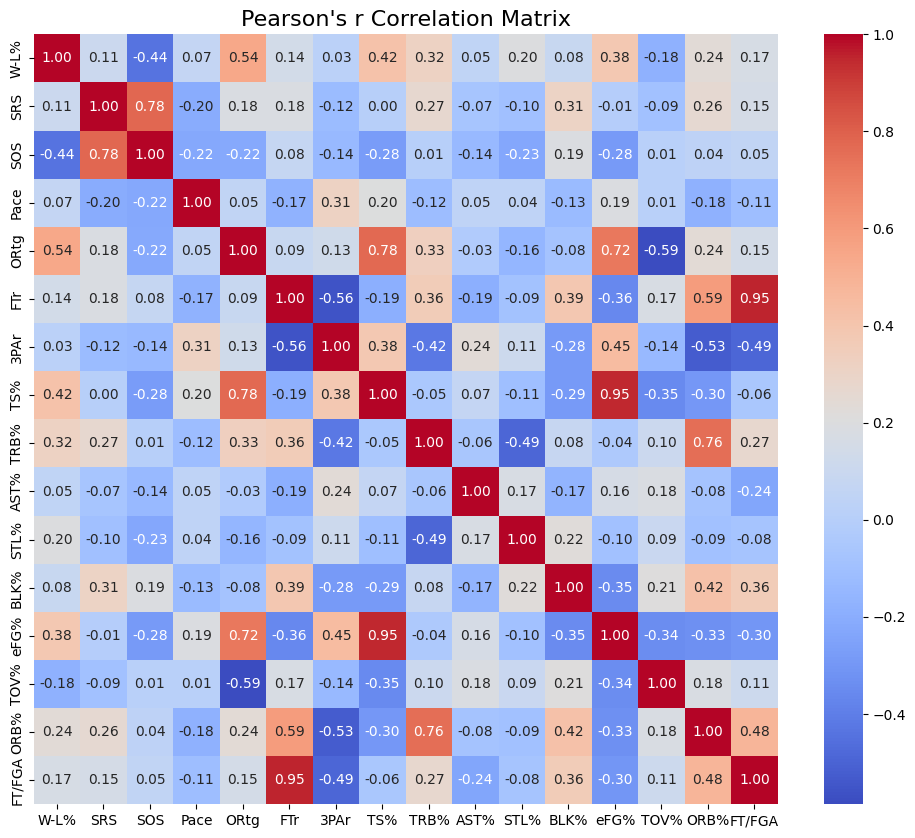

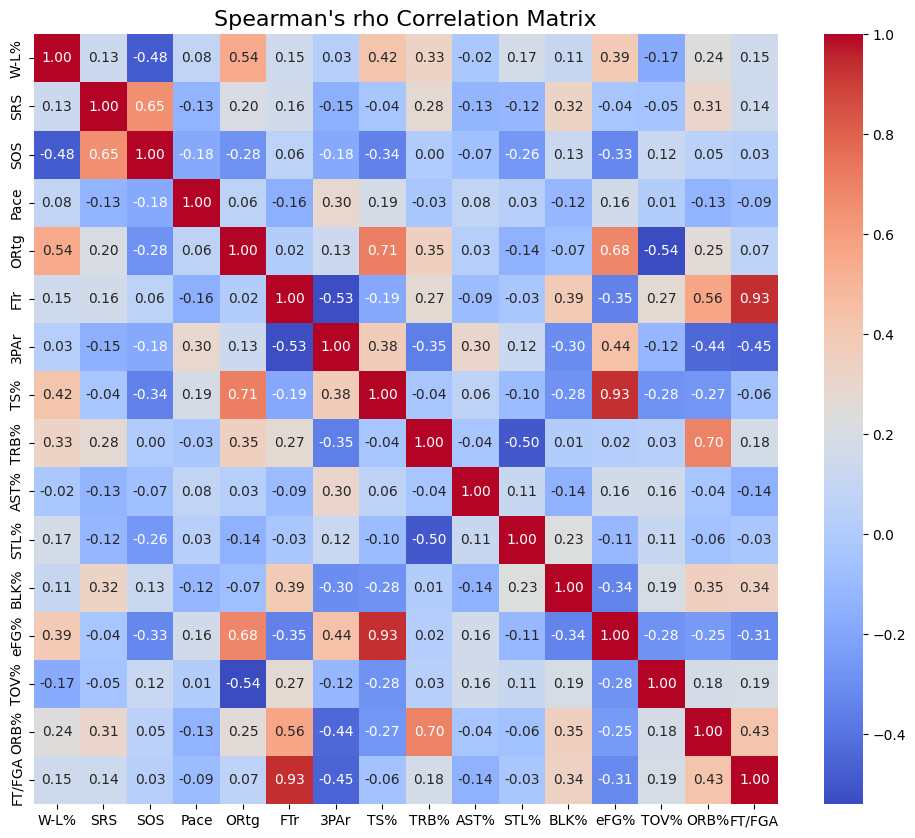

In [10]:
import pandas as pd


# Assuming df_underdog_stats is your DataFrame and it's already loaded

# List of statistical categories to analyze with W-L%, including 'W-L%' for correlation analysis
categories = ['W-L%', 'SRS', 'SOS', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA']

# Subset the DataFrame to include only the relevant categories for correlation analysis
df_analysis = df_underdog_stats[categories]

# Calculate Pearson's r correlation matrix
pearsons_corr_matrix = df_analysis.corr(method='pearson')

# Calculate Spearman's rho correlation matrix
spearman_corr_matrix = df_analysis.corr(method='spearman')

# Plotting Pearson's r correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Pearson's r Correlation Matrix", fontsize=16)
sns.heatmap(pearsons_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

# Plotting Spearman's rho correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Spearman's rho Correlation Matrix", fontsize=16)
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Time Series Analysis</title>
</head>
<body>
    <header>
        <h1>Time Series Analysis</h1>
    </header>
    <main>
        <p>Since we have data spanning ten years, time series analysis can uncover trends over time. I analyze how the profile of successful underdog teams has evolved. I do this using moving averages and exponential smoothing to identify trends. This provides an investigation into whether certain stats become more or less important over time in contribution to underdog success.</p>
        <p>This code can be easily adjusted to examine whichever statistical categories you please. The comments provide guidance.</p>
    </main>
</body>
</html>


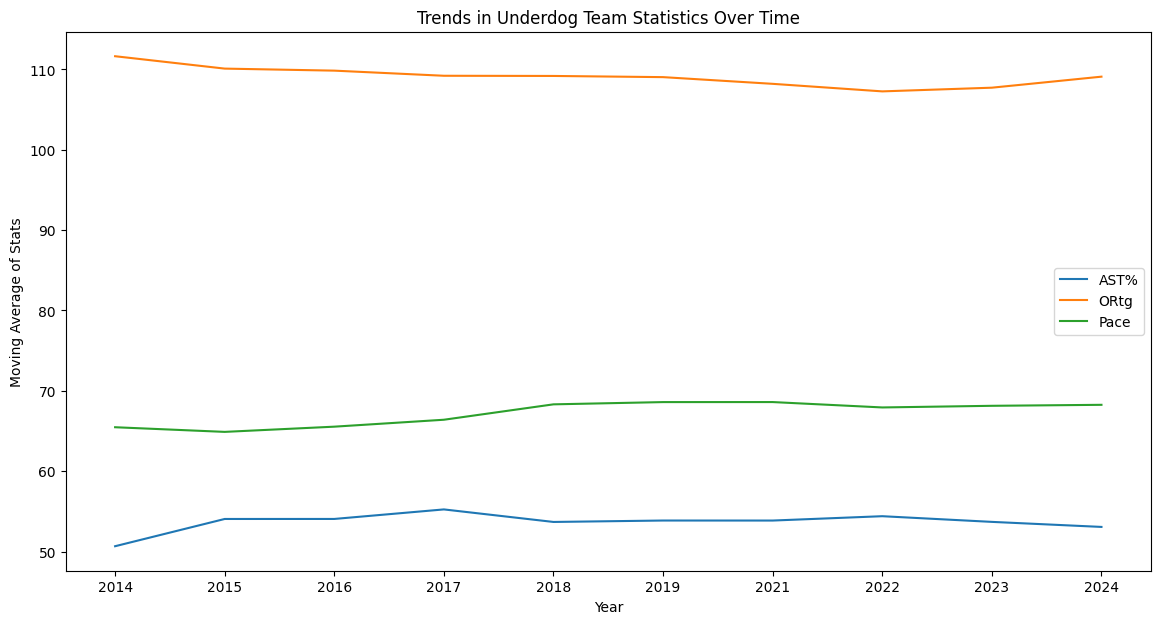

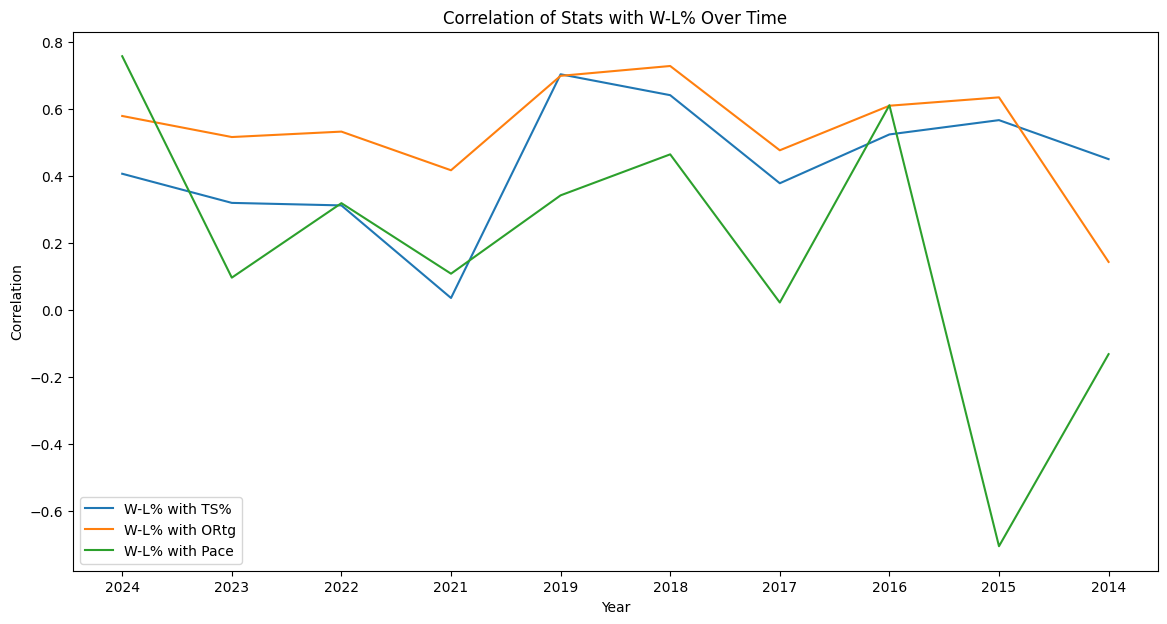

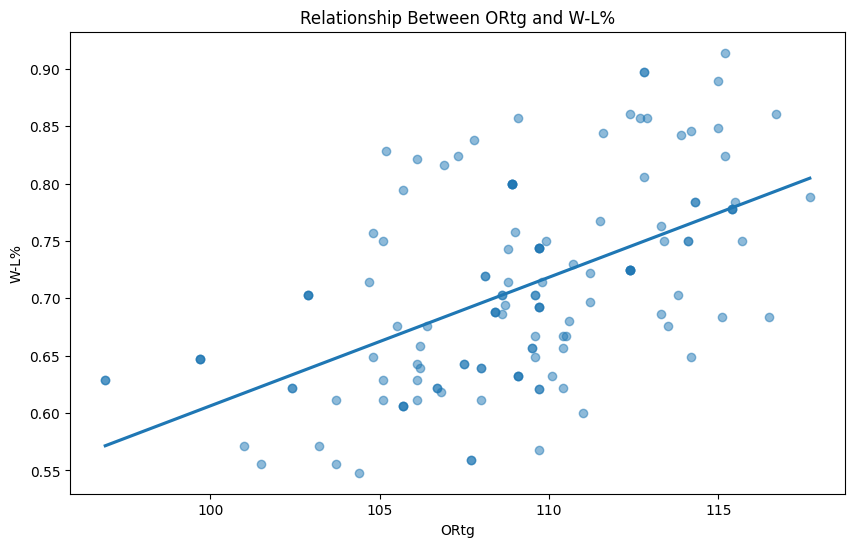

In [11]:
# List of statistical categories for analysis
categories = ['SRS', 'SOS', 'Pace', 'ORtg', 'FTr', '3PAr', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA']

# Calculate yearly means for each category
yearly_stats = df_underdog_stats.groupby('Year')[categories + ['W-L%']].mean()

# Use a moving average to identify trends. Adjust the window size if needed.
window_size = 3  # Example window size for the moving average
moving_averages = yearly_stats.rolling(window=window_size, min_periods=1).mean()

# Plotting trends for 'SRS', 'SOS', and 'Pace' as examples. Repeat for other stats if needed.
plt.figure(figsize=(14, 7))

#Adjust these categories as needed
for stat in ['AST%', 'ORtg', 'Pace']:
    plt.plot(moving_averages.index, moving_averages[stat], label=stat)

plt.title('Trends in Underdog Team Statistics Over Time')
plt.xlabel('Year')
plt.ylabel('Moving Average of Stats')
plt.legend()
plt.show()

correlations_over_time = pd.DataFrame(index=df_underdog_stats['Year'].unique(), columns=categories)

# Calculate correlations for each year
for year in df_underdog_stats['Year'].unique():
    yearly_data = df_underdog_stats[df_underdog_stats['Year'] == year]
    for category in categories:
        correlation = yearly_data[category].corr(yearly_data['W-L%'])
        correlations_over_time.at[year, category] = correlation

correlations_over_time = correlations_over_time.astype(float)  # Ensure all values are floats for plotting

# Plotting the correlation trends for a few statistics as examples
plt.figure(figsize=(14, 7))

# Adjust these categories as needed
for stat in ['TS%', 'ORtg', 'Pace']:
    plt.plot(correlations_over_time.index, correlations_over_time[stat], label=f'W-L% with {stat}')

plt.title('Correlation of Stats with W-L% Over Time')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=df_underdog_stats, x='ORtg', y='W-L%', ci=None, scatter_kws={'alpha':0.5}) #Modify x and y as needed
plt.title('Relationship Between Adv. Stat and W-L%')
plt.xlabel('Adv. Stat')
plt.ylabel('W-L%')
plt.show()


<p>The following visuals give interesting insights into underdog statistics. For example in 2016 (Stephen Curry's unanimous MVP year) team pace's correlation with W-L% peaked but reached its lowest point in just the next year. This probes questions of a potential rule change to slow pace. By looking at these graphs anyone can get a snapshot of what underdog stats mean to winning.</p>
<h2>The end.</h2>